In [4]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

path = Path('/Users/JAEMIN/Downloads/Nanorod Project/Spectroscopy/UV-Vis/13_01_2026/December_2025_All_Particles.csv')
# read file with semicolon delimiter, no header
raw = pd.read_csv(path, sep=';', header=None, engine='python')
# transpose and convert to a new DataFrame
df = pd.DataFrame(raw.values.T)
df.drop(index=[0, 1, 3, 4], inplace=True)
df.reset_index(drop=True, inplace=True)

# Get the next available column index
next_col = len(df.columns)
#df[next_col] = pd.to_numeric(df[1], errors='coerce') - pd.to_numeric(df[2], errors='coerce')

# use first row as header, then drop it and reset the index
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)

df = df.drop(df[(df['Name'] < 350) | (df['Name'] > 1050)].index)

df.head()

,Name,AuNR-cy35-peg,AuNR-peg,AuNR,cy35
50,350.0,0.3565,0.3215,0.3835,0.0064
51,351.0,0.3568,0.3205,0.3822,0.0063
52,352.0,0.3551,0.3203,0.3805,0.0045
53,353.0,0.3562,0.3201,0.3818,0.0054
54,354.0,0.3556,0.3209,0.3808,0.0052


AuNR-cy35-peg: Max Y: 0.4575 at X: 771.0
AuNR-peg: Max Y: 0.7187 at X: 753.0
AuNR: Max Y: 1.0776 at X: 756.0
cy35: Max Y: 0.6047 at X: 549.0


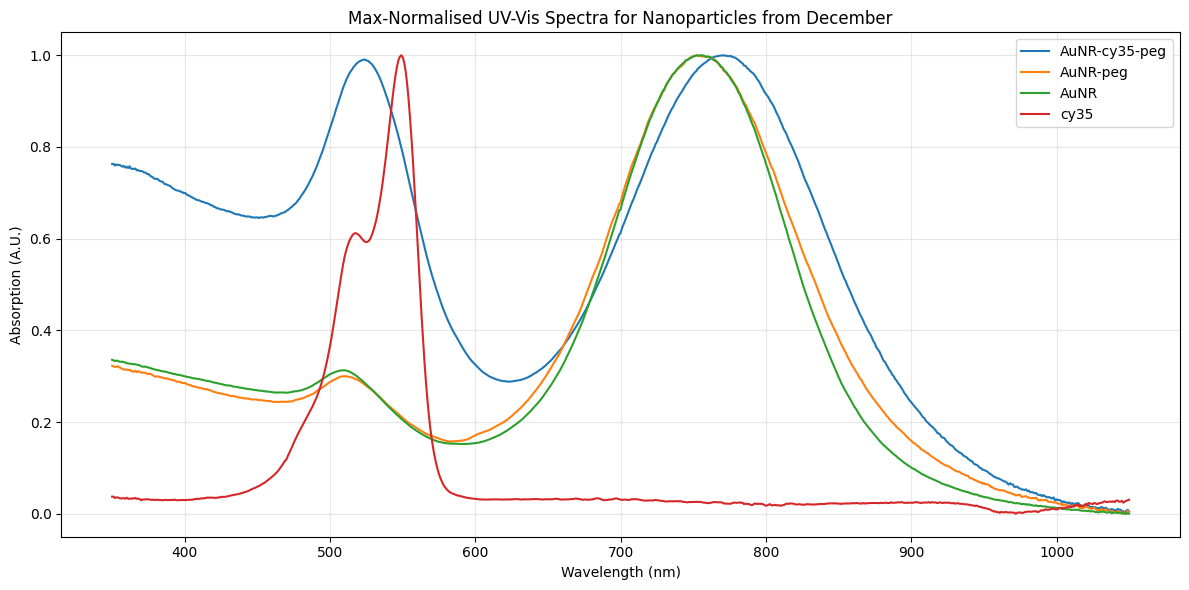

In [8]:
# use first column as x
x_col = df.columns[0]
x = pd.to_numeric(df[x_col], errors='coerce')
valid_rows = x.notna()
x = x[valid_rows]

# all other columns are y-series
y_cols = [c for c in df.columns if c != x_col]

fig, ax = plt.subplots(figsize=(12, 6))

normalise = True

for col in y_cols:
    y = pd.to_numeric(df[col], errors='coerce')[valid_rows]
    if y.dropna().empty:
        continue
    # find maximum y and corresponding x
    idx = y.idxmax()
    idx_min = y.idxmin()
    if pd.isna(y.loc[idx]):
        continue
    x_at_max = x.loc[idx]
    y_max = y.loc[idx]
    y_min = y.loc[idx_min]
    #color = line.get_color()
    if normalise == True:
        line, = ax.plot(x, (y - y_min)/(y_max - y_min), label=col)
    else:
        line, = ax.plot(x, y, label=col)
        ax.scatter([x_at_max], [y_max])#, color=color, s=50, zorder=5)
    print(f'{col}: Max Y: {y_max} at X: {x_at_max}')

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorption (A.U.)')
ax.set_title('Max-Normalised UV-Vis Spectra for Nanoparticles from December')
ax.grid(alpha=0.3)
ax.legend(loc='best')#, bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

In [2]:
# 400 nm norm
# use first column as x
x_col = df.columns[0]
x = pd.to_numeric(df[x_col], errors='coerce')
valid_rows = x.notna()
x = x[valid_rows]

# all other columns are y-series, excluding 'cy35'
y_cols = [c for c in df.columns if c != x_col and c != 'cy35']

fig, ax = plt.subplots(figsize=(12, 6))
for col in y_cols:
    y = pd.to_numeric(df[col], errors='coerce')[valid_rows]
    if y.dropna().empty:
        continue
    # normalize by value at 400 nm
    y_400_idx = (x - 400).abs().idxmin()
    y_400 = y.loc[y_400_idx]
    if pd.isna(y_400) or y_400 == 0:
        continue
    y_normalized = y / y_400
    line, = ax.plot(x, y_normalized, label=col)

ax.set_xlabel(x_col)
ax.set_ylabel('Normalized Value (@ 400 nm)')
ax.set_title('UV-Vis Spectra for Nanoparticles (400 nm Normalized)')
ax.grid(alpha=0.3)
ax.legend(loc='best', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined